# Assignment: Fashion MNIST Classification with Artificial Neural Networks (ANNs) and Visualizations

# 1. Dataset Exploration

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import seaborn as sns

# Since I want to split the data randomly, use this variable
# to always get the same split of data, if needed
seed = 421

/Users/ivantravisany/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Combine train and test datasets
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Randomly split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=seed)

In [3]:
# Explore the Fashion MNIST dataset structure
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (56000, 28, 28)
Training labels shape: (56000,)
Test data shape: (14000, 28, 28)
Test labels shape: (14000,)


In [4]:
# Get all class values
unique_classes = np.unique(y_train)

print("Unique class values:", unique_classes)

Unique class values: [0 1 2 3 4 5 6 7 8 9]


#### **Observations**:

It seems the class has only numerical values. According to the Fashion MNIST documentation, each value corresponds to an actual class name.

[Link to Fashion MNIST Documentation](https://github.com/zalandoresearch/fashion-mnist)

In [5]:
# Define class names according to the documentation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Data Preprocessing

In [6]:
# Image pixels range from 0 to 255, representing the grayscale intensity
# To normalize them, we have to divide by the total range, getting range 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# Fashion MNIST images are 28x28 grayscale images. Adding a channel dimension
# (last dimension, with size 1) ensures compatibility with CNNs,
# which expect a channel dimension even for grayscale data
# So in order to include a channel dimension, the following reshape is needed:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [8]:
# And before performing one-hot encoding to the labels, I am going
# to save the labels in an auxiliary variable for visualizing later on
original_y_train = y_train.copy()

In [9]:
# Perform one-hot encoding to labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Data Visualizations

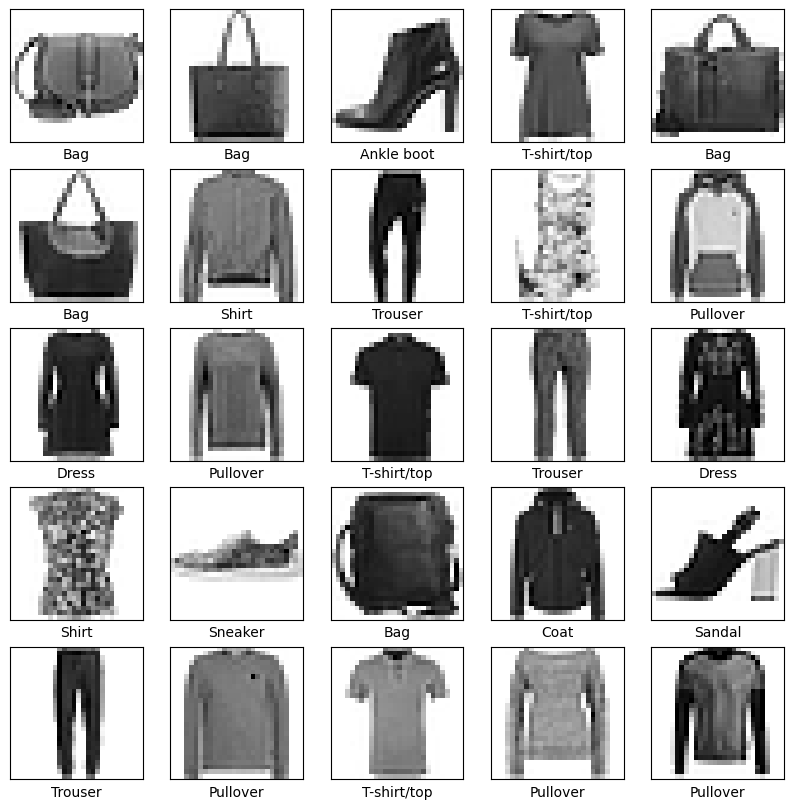

In [10]:
# Display a few sample images from the randomized dataset,
# using the labels saved before one-hot encoding them
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[original_y_train[i]])
plt.show()

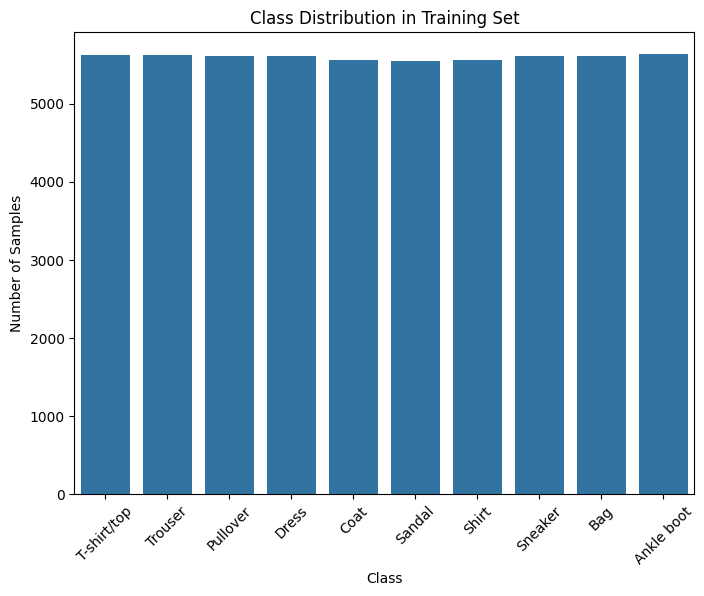

In [11]:
# Calculate the distribution of classes, useful for the following plots
class_counts = np.bincount(np.argmax(y_train, axis=1))

# The assignment asks for a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=class_names, y=class_counts)
plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Samples")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.show()

#### **Observations**:

The bar plot is not a good representation for the classes due to the almost identical distribution. A pie chart would be a much better fit for this visualization

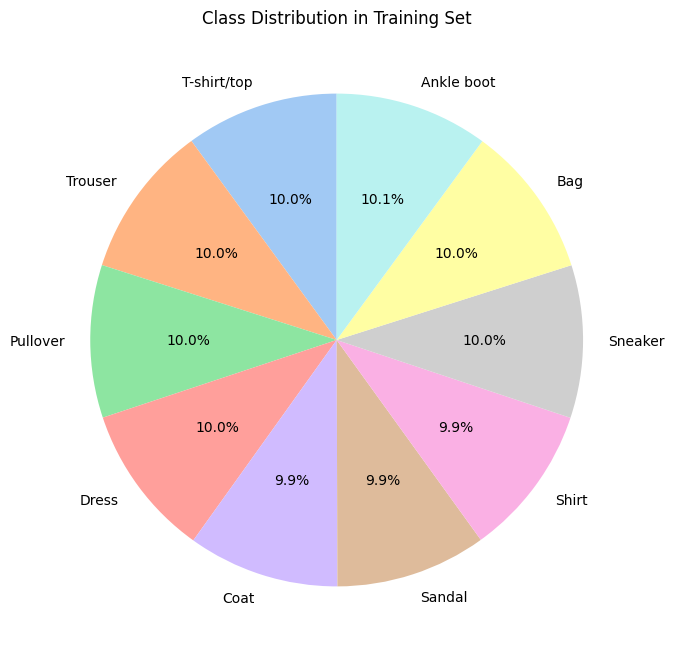

In [12]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Class Distribution in Training Set")
plt.show()

# 4. Machine Learning Model

## 4.1. ANN Model Building

In [13]:
# The following will create a linear stack of layers, where the output of one layer
# will become the input of the next, which is needed in ANNs
# Sequential creates a linear stack of layers, passing outputs to the next layer
# Flatten reshapes input for fully connected Dense layers
# Dropout helps reduce overfitting
# The output layer has one neuron per class with softmax activation to generate probabilities
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

/Users/ivantravisany/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4.2. Model Compilation

In [14]:
# The model uses the Adam optimizer for efficient training, categorical
# cross-entropy for multi-class classification, and tracks accuracy as the
# evaluation metric
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 4.3. Model Training

In [15]:
# Now the model is evaluated on a test set to compute test loss and accuracy
# Predictions are made on the test data, and each image is assigned the class
# with the highest probability
# Training runs for ten epochs with an 80-20 train-validation split
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7409 - loss: 0.7290 - val_accuracy: 0.8327 - val_loss: 0.4616
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8413 - loss: 0.4301 - val_accuracy: 0.8558 - val_loss: 0.4017
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8542 - loss: 0.3930 - val_accuracy: 0.8612 - val_loss: 0.3813
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8651 - loss: 0.3664 - val_accuracy: 0.8706 - val_loss: 0.3554
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8685 - loss: 0.3447 - val_accuracy: 0.8742 - val_loss: 0.3463
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.3386 - val_accuracy: 0.8697 - val_loss: 0.3537
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8812 - loss: 0.3192 - val_accuracy: 0.8768 - val_loss: 0.3401
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8853 - loss: 0.3041 - 

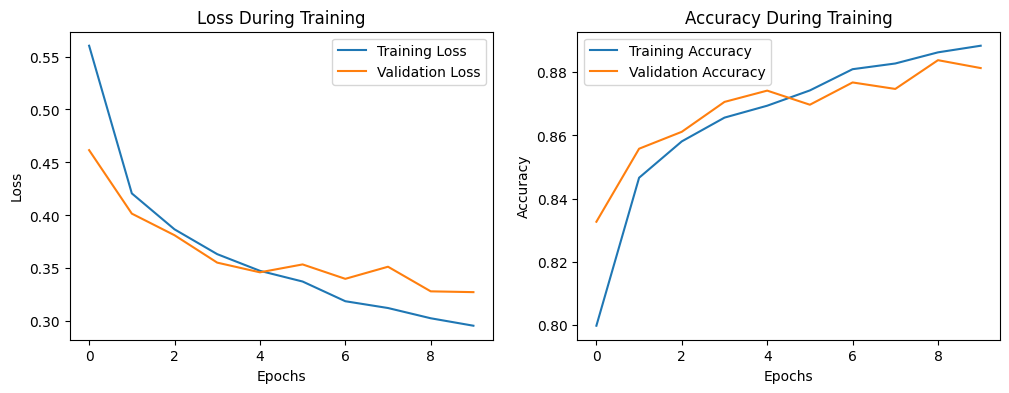

In [16]:
# A subset of test images is displayed with true labels and predictions,
# providing a visual summary of the model’s performance

# Training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Observations**:

As epochs goes by, we can see the following:
- **Loss Graph**
    - *Training loss* decreases, which indicates that the model is learning and improving its fit on the training data.
    - *Validation loss* Also decreases, and then stabilizes, showing that the model is not overfitting significantly and is generalizing reasonably well to the validation data.
    - The *gap* between both curves remains small, which is a good indicator that the model has achieved a stable training process.
- **Accuracy Graph**
    - *Training accuracy* improves continuously, reaching over 90% by the final epoch.
    - *Validation accuracy* also improves continuously but not getting as high as the training accuracy.
    - Similarly to the observation on the loss graph, the small *gap* is an indication that the model is learning effectively without major overfitting.

## 4.4. Model Evaluation

In [17]:
# The model is evaluated on the test dataset to measure its performance
# on unseen data
# The evaluate method calculates the test loss and test accuracy
# These metrics reflect how well the model predicts the correct labels
# and how far its predictions deviate from the true values
# The results are printed in a concise format to summarize the model’s effectiveness
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.8892 - loss: 0.3088
Test Loss: 0.3168, Test Accuracy: 0.8866


#### **Observations**:

The final results show a test loss of 0.3274 and test accuracy of 88.20%, closely matching the training and validation performance. This indicates good generalization and effective classification on the Fashion MNIST dataset, with no signs of overfitting so far

# 5. Predictions on Test Set

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


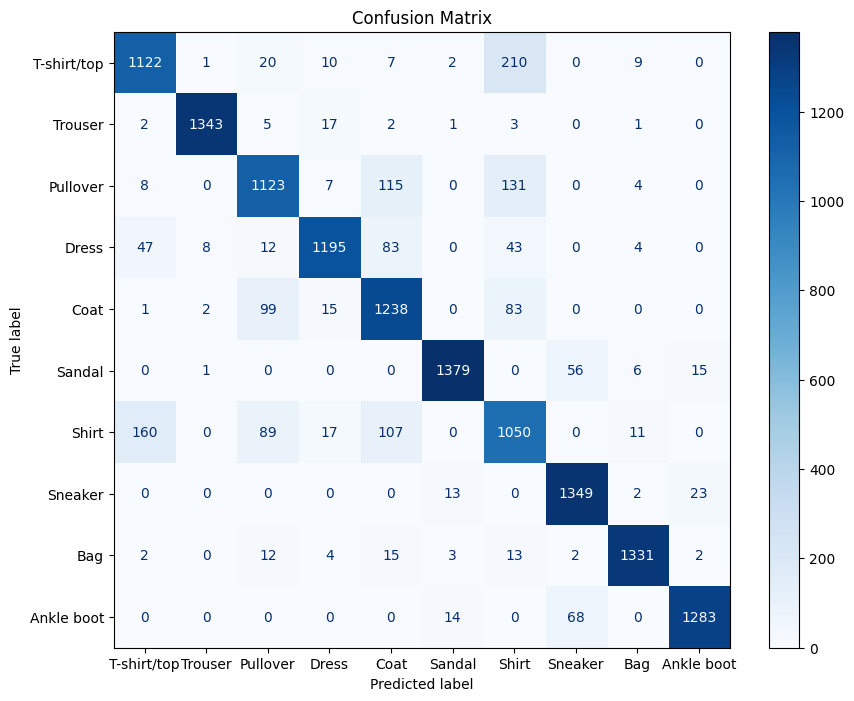

In [18]:
# The model predicts class probabilities for the test set, which are
# converted to class indices
# A confusion matrix compares true labels with predictions, showing
# performance for each class
# It is visualized with a blue color map for easy interpretation of misclassifications

# Generate predictions for the test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())  # Use integer formatting for values
plt.title("Confusion Matrix")
plt.show()

#### **Observations**:

The confusion matrix shows how well the model classifies each category in the Fashion MNIST dataset. Diagonal values represent correct classifications, while off-diagonal values indicate misclassifications

- **High Accuracy for Certain Classes**: Categories like *Trouser*, *Sandal*, *Sneaker*, and *Bag* have strong performance, with most predictions on the diagonal, meaning they are rarely confused with other classes
- **Common Misclassifications**: The model struggles with distinguishing between similar-looking items, such as *Pullover*, *Coat*, and *Shirt*, as indicated by higher off-diagonal values among these classes. For example, *Shirt* is often misclassified as *T-shirt/top* and *Pullover*, which, to be fair, happens to me as well
- **Overall Performance**: The model performs well overall but shows room for improvement in distinguishing between clothing items that have similar shapes or appearances.

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


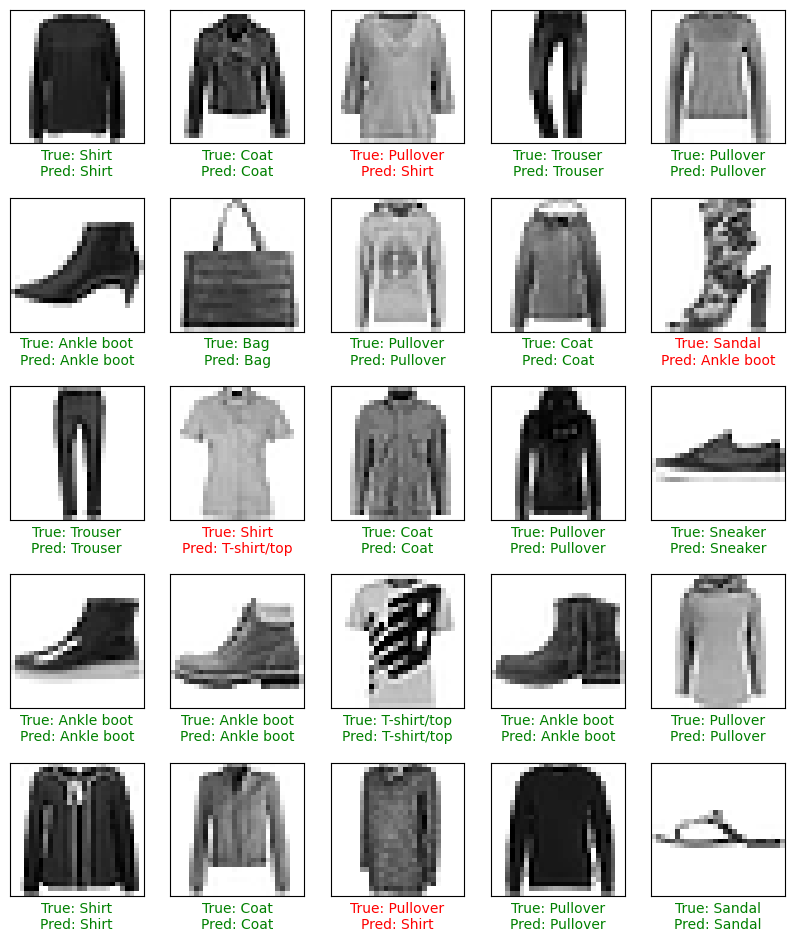

In [19]:
# Now to visually an example of said missclassification and overall performance
# by plotting a prediction classes on test set

# Predict classes on the test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Display a few test images with predictions
plt.figure(figsize=(10, 12))  # Slightly increased length for label visibility
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    true_label = class_names[true_classes[i]]
    predicted_label = class_names[predicted_classes[i]]
    color = 'green' if true_label == predicted_label else 'red'
    plt.xlabel(f"True: {true_label}\nPred: {predicted_label}", color=color)

# Adjust spacing between plots to ensure labels are readable
plt.subplots_adjust(hspace=0.1)
plt.show()

#### **Observations**:

As we learned in the model evaluation part, the model correctly classifies most of the items and has a little bit of problem with some of them.
This indicates good performance on distinct classes but difficulty distinguishing visually similar ones, suggesting room for improvement in handling similar categories.

# 6. Final Thoughts

This project successfully classified images from the Fashion MNIST dataset using a neural network model. The model achieved high accuracy and demonstrated strong generalization, particularly for most of the classes. However, it faced challenges a few distinguishing visually similar items on certain classes.

**Key Points**:

- **Model Performance**: Achieved high test accuracy with minimal overfitting, as indicated by consistent training and validation metrics.
- **Strengths**: Excelled in classifying distinct items with clear visual differences.
- **Challenges**: Struggled with similar clothing types, indicating potential for improvement in feature extraction.
- **Future Improvements**: Consider exploring advanced models or data augmentation to enhance differentiation among similar classes.

Overall, the project demonstrates a solid approach to image classification with neural networks and highlights areas for further optimization.